In [7]:
import matplotlib.pyplot as plt
import os
import sys
import string

In [12]:
def parse(line):
    # return a dict 
    items = line.split()
    ret = {}
    for i in range(0,len(items)-1):
        if(items[i] in ["Epoch:", "Test:"] or (len(items) < 5 and items[i][0] in string.ascii_letters)):
            ret[items[i]] = items[i+1]
        elif(items[i][0] in string.ascii_letters):
            ret[items[i]] = items[i+2][1:-1]
#         Epoch: Time 0.011 (0.011)	Data 0.003 (0.003)	Loss 3.7305 (3.7305)	Prec@1 0.000 (0.000)	Prec@5 56.250 (56.250)
    return ret
TrainPrec1 = [None]
TrainPrec5 = [None]
TestPrec1 = []
TestPrec5 = []
with open("../tmp/nohup.out","r") as f:
    for l in f.readlines():
        itms = parse(l)
        print(itms)
        if("Epoch:" in itms.keys()): # training phase
            TrainPrec1[-1] = float(itms['Prec@1'])
            TrainPrec5[-1] = float(itms['Prec@5'])
        elif("Test:" not in itms.keys()): # validating phase
            TestPrec1.append(float(itms['Prec@1']))
            TestPrec5.append(float(itms['Prec@5']))
            TrainPrec1.append(None)
            TrainPrec5.append(None)
TrainPrec1 = TrainPrec1[:-1]
TrainPrec5 = TrainPrec5[:-1]
print(TrainPrec1)
print(TrainPrec5)
print(TestPrec1)
print(TestPrec5)

{'Epoch:': '[0][0/965]', 'Time': '0.023', 'Data': '0.005', 'Loss': '5.3828', 'Prec@1': '0.000', 'Prec@5': '0.000'}
{'Epoch:': '[0][400/965]', 'Time': '0.010', 'Data': '0.003', 'Loss': '4.8974', 'Prec@1': '3.398', 'Prec@5': '13.887'}
{'Epoch:': '[0][800/965]', 'Time': '0.009', 'Data': '0.003', 'Loss': '4.6238', 'Prec@1': '4.760', 'Prec@5': '18.024'}
{'Test:': '[0/419]', 'Time': '0.008', 'Loss': '4.0748', 'Prec@1': '0.000', 'Prec@5': '37.500'}
{'Test:': '[400/419]', 'Time': '0.005', 'Loss': '4.0734', 'Prec@1': '9.149', 'Prec@5': '27.541'}
{'Prec@1': '9.217', 'Prec@5': '27.502'}
{'Epoch:': '[1][0/965]', 'Time': '0.011', 'Data': '0.003', 'Loss': '3.7305', 'Prec@1': '0.000', 'Prec@5': '56.250'}
{'Epoch:': '[1][400/965]', 'Time': '0.009', 'Data': '0.003', 'Loss': '3.7950', 'Prec@1': '12.406', 'Prec@5': '34.585'}
{'Epoch:': '[1][800/965]', 'Time': '0.009', 'Data': '0.003', 'Loss': '3.7900', 'Prec@1': '12.539', 'Prec@5': '35.276'}
{'Test:': '[0/419]', 'Time': '0.006', 'Loss': '3.4179', 'Prec@1

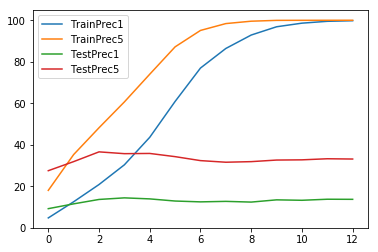

In [20]:
X = [0,1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(X,TrainPrec1,label = "TrainPrec1")
plt.plot(X,TrainPrec5,label = "TrainPrec5")
plt.plot(X,TestPrec1,label = "TestPrec1")
plt.plot(X,TestPrec5,label = "TestPrec5")
plt.legend()
plt.show()

In [ ]:
haha